In [141]:
# %matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import pandas as pd
import numpy as np 



In [142]:
PATH = "../results/headon_step-precise-collisions.csv"
with open(PATH, "r") as f:
    print(f.readline())

step,contactLevel,contactEvents,drone_speed,drone_y_pos,drone_horizontal_turn_rate,heli_speed,drone_response_distance



In [143]:
all_exps = pd.read_csv(PATH)#.drop_duplicates()
print(all_exps.shape[0])
all_exps['drone_horizontal_turn_rate'] = 180 / np.pi * all_exps['drone_horizontal_turn_rate']
all_exps['drone_speed'] = 1/1.444447 * all_exps['drone_speed']
all_exps['heli_speed'] = 1/1.444447 * all_exps['heli_speed']
all_exps['is_violation'] = np.where(
    (all_exps['contactLevel'] != 'none') | ("violation" in all_exps['contactEvents']) | ("collision" in all_exps['contactEvents']), 
    1, 0)
# violations = all_exps[(all_exps['contactLevel'] == 'violation') | (all_exps['contactLevel'] == 'collision')]
# violations.columns
all_exps = all_exps.round(4)
all_exps

30240


,step,contactLevel,contactEvents,drone_speed,drone_y_pos,drone_horizontal_turn_rate,heli_speed,drone_response_distance,is_violation
0,520,violation,"ContactEvent[ContactEvent((Vehicle(1, (6573.57...",28.4307,4000.0,6.0,106.6152,3000.0,1
1,520,violation,"ContactEvent[ContactEvent((Vehicle(1, (6384.09...",32.4923,4000.0,6.0,106.6152,3000.0,1
2,520,violation,"ContactEvent[ContactEvent((Vehicle(1, (6263.24...",36.5538,4000.0,6.0,106.6152,3000.0,1
3,520,violation,"ContactEvent[ContactEvent((Vehicle(1, (6081.37...",40.6153,4000.0,6.0,106.6152,3000.0,1
4,520,violation,"ContactEvent[ContactEvent((Vehicle(1, (5976.95...",44.6768,4000.0,6.0,106.6152,3000.0,1
...,...,...,...,...,...,...,...,...,...
30235,520,none,ContactEvent[],32.4923,4500.0,20.0,126.9229,8000.0,0
30236,520,none,ContactEvent[],36.5538,4500.0,20.0,126.9229,8000.0,0
30237,520,none,ContactEvent[],40.6153,4500.0,20.0,126.9229,8000.0,0
30238,520,none,ContactEvent[],44.6768,4500.0,20.0,126.9229,8000.0,0


In [144]:
# dups = violations.groupby([col for col in violations.columns], as_index=False).size()
# violations = violations.drop_duplicates()
# dups['size']

In [145]:
def add_temp_legend(values, element, ax):
    np.unique(values)[::-1].sort()
    colors = [ element.cmap(element.norm(value)) for value in values]
    # create a patch (proxy artist) for every color 
    patches = [ mpatches.Patch(color=colors[i], label="{l} violations".format(l=values[i]) ) for i in range(len(values)) ]
        
    ax.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

def heatmap(df: pd.DataFrame, x_key: str, y_key: str, title:str, **kwargs):
    df = df.groupby([x_key,y_key], as_index=False).agg({'is_violation': np.sum})
    df = df.pivot(columns=x_key, index=y_key, values="is_violation")
    
    fig, ax = plt.subplots()
    im = ax.imshow(df.to_numpy(), **kwargs)
    ax.set_title(title)
    ax.set_xlabel(x_key)
    ax.set_ylabel(y_key)
    
    ax.set_xticks(np.arange(0, len(df.columns), 1))
    ax.set_yticks(np.arange(0, len(df.index), 1))
    ax.set_xticklabels(list(map(lambda v: round(v, 2), df.columns)))
    ax.set_yticklabels(list(map(lambda v: round(v, 2), df.index)))
    
    values = np.unique(df.to_numpy().flatten())
    
    add_temp_legend(values, im, ax)
    
    
    
def isolate(df: pd.DataFrame, cols: dict): # keys:list[str], values:list
    exp = None
    for k, v in cols.items():
        if exp is None:
            exp = df[k] == v
        else:
            exp &= df[k] == v
            
    return df[exp]
    

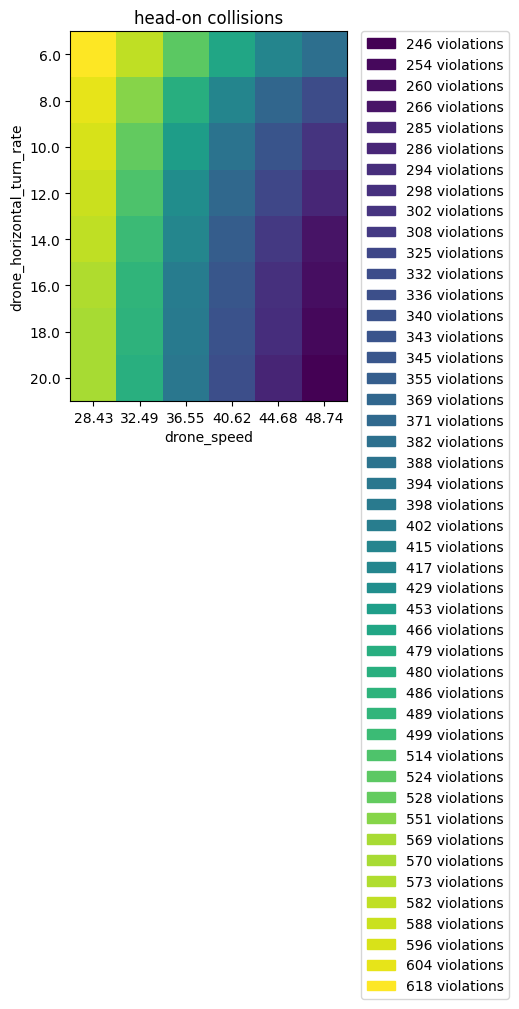

In [146]:
heatmap(all_exps, "drone_speed", "drone_horizontal_turn_rate", "head-on collisions")


Commenting on the figure above, top-right is the highest turn radius, which means
that the drone will be closer to the helicopter

In [147]:
all_exps.drone_response_distance.unique()

array([3000., 3250., 3500., 3750., 4000., 4250., 4500., 4750., 5000.,
       5250., 5500., 5750., 6000., 6250., 6500., 6750., 7000., 7250.,
       7500., 7750., 8000.])

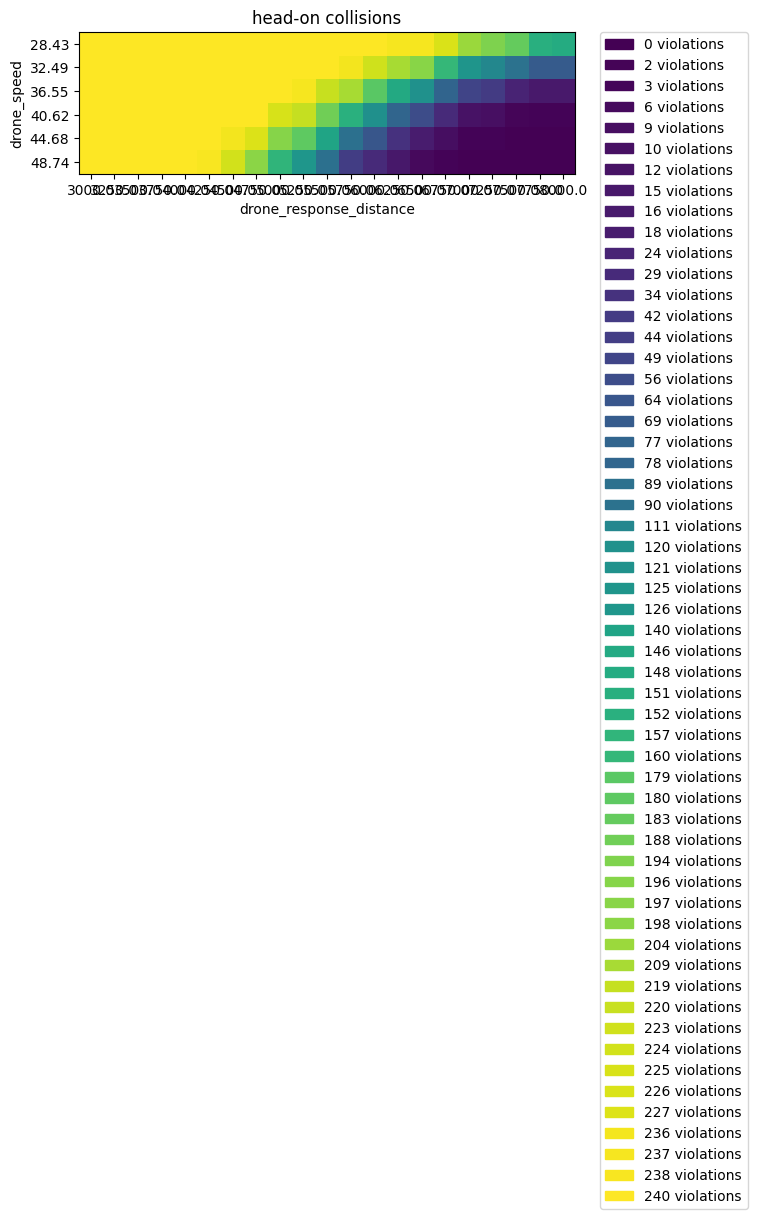

In [148]:
tmp = all_exps[all_exps['drone_y_pos'] <= 2000]#[all_exps['drone_horizontal_turn_rate'] > 35]
# tmp = isolate(tmp, {"drone_horizontal_turn_rate": 30})
heatmap(all_exps, "drone_response_distance", "drone_speed", "head-on collisions")

Commenting on the figure above, the bottom left

In [149]:
tmp

,step,contactLevel,contactEvents,drone_speed,drone_y_pos,drone_horizontal_turn_rate,heli_speed,drone_response_distance,is_violation


In [150]:
colsa = {
    "drone_speed" : 35.0,
    "drone_response_distance" : 1000.0,
    # "heli_speed": 35.0,
    # "drone_y_pos": 1000.0,
    # "drone_horizontal_turn_rate": 10.0,
    "is_violation" : 1,
}
colsb = {
    "drone_speed" : 50.0,
    "drone_response_distance" : 800.0,
    "heli_speed": 35.0,
    "drone_y_pos": 2000,
    "drone_horizontal_turn_rate": 10,
    "is_violation" : 1,
}

a = isolate(all_exps, colsa)
b = isolate(all_exps, colsb)
a


,step,contactLevel,contactEvents,drone_speed,drone_y_pos,drone_horizontal_turn_rate,heli_speed,drone_response_distance,is_violation


In [151]:
all_exps[(all_exps['drone_response_distance'] == 1200) & (all_exps['drone_speed'] == 20)].describe()

,step,drone_speed,drone_y_pos,drone_horizontal_turn_rate,heli_speed,drone_response_distance,is_violation
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN


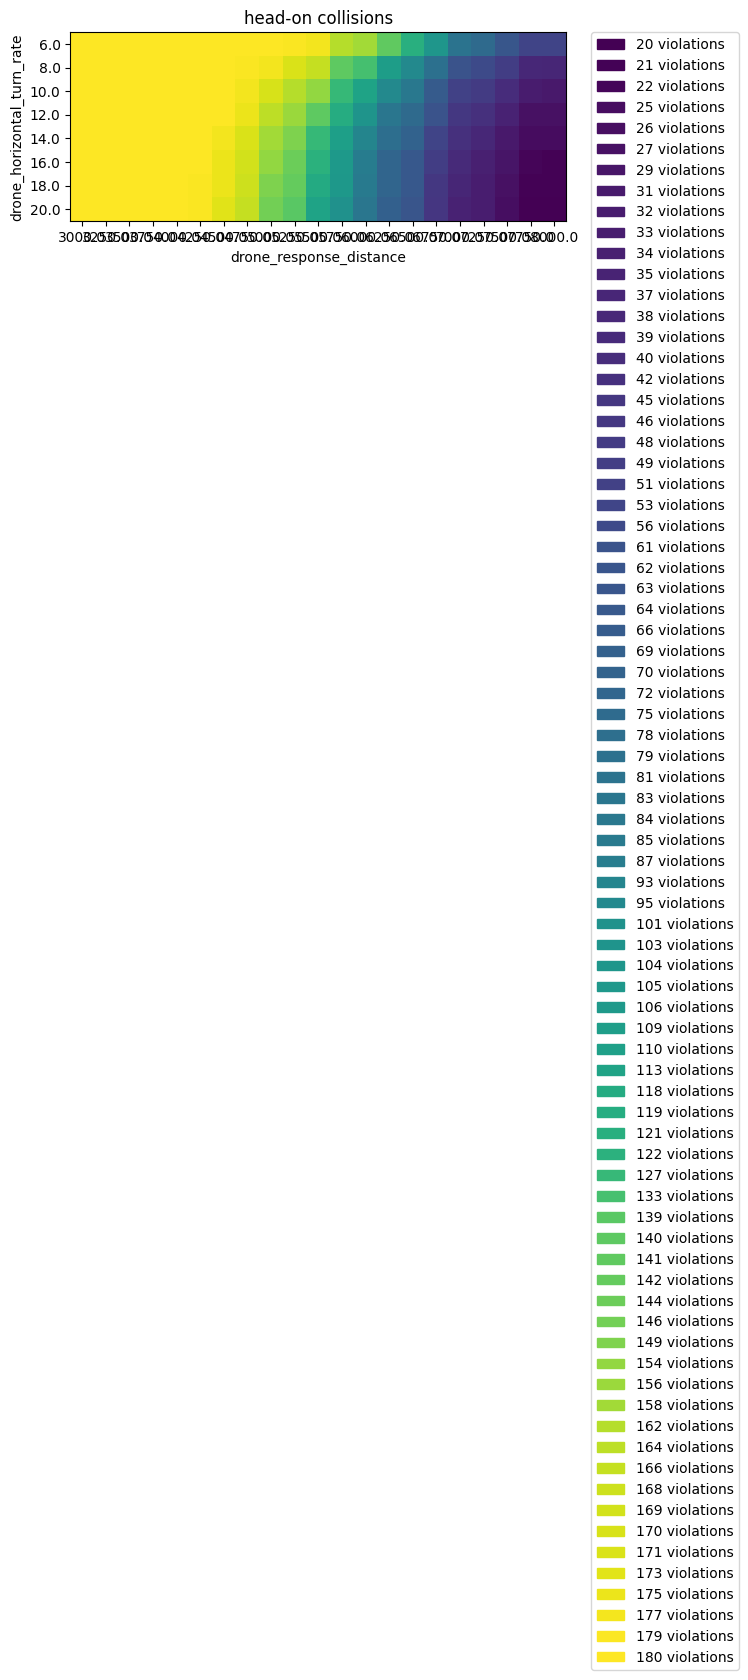

In [152]:
tmp = all_exps#[all_exps['drone_y_pos'] <= 2000]
# tmp = isolate(tmp, {"drone_speed": 20})
heatmap(tmp, "drone_response_distance", "drone_horizontal_turn_rate", "head-on collisions")


3D, visualizing speed, rate of turn, and vis distance all in one

In [153]:
def plot_point_cloud(df: pd.DataFrame, x_key: str, y_key: str, z_key: str, title: str, point_radius: float = None):
    fig = plt.figure()
    fig.set_figheight(10)
    fig.set_figwidth(10)
    ax = fig.add_subplot(projection='3d')
    
    x = df[x_key].unique()
    x.sort()
    y = df[y_key].unique()
    y.sort()
    z = df[z_key].unique()
    z.sort()
    
    points = []
    temps = []
    
    
    for zi in z:
        for yi in y:
            for xi in x:
                points.append((xi, yi, zi))
                temps.append(isolate(df, {x_key:xi, y_key:yi, z_key:zi}).size)

    s = point_radius ** 2 if point_radius else None

    print(len(points), points)

    scat = ax.scatter(*np.array(points).T, c=temps, alpha=0.7, s=s)
    ax.set_xlabel(x_key)
    ax.set_ylabel(y_key)
    ax.set_zlabel(z_key)
    ax.set_title(title)
    
        
    
    add_temp_legend(np.unique(np.array(temps[::-1]).flatten()), scat, ax)
    

In [154]:
all_exps.columns

Index(['step', 'contactLevel', 'contactEvents', 'drone_speed', 'drone_y_pos',
       'drone_horizontal_turn_rate', 'heli_speed', 'drone_response_distance',
       'is_violation'],
      dtype='object')

1008 [(28.4307, 6.0, 3000.0), (32.4923, 6.0, 3000.0), (36.5538, 6.0, 3000.0), (40.6153, 6.0, 3000.0), (44.6768, 6.0, 3000.0), (48.7384, 6.0, 3000.0), (28.4307, 8.0, 3000.0), (32.4923, 8.0, 3000.0), (36.5538, 8.0, 3000.0), (40.6153, 8.0, 3000.0), (44.6768, 8.0, 3000.0), (48.7384, 8.0, 3000.0), (28.4307, 10.0, 3000.0), (32.4923, 10.0, 3000.0), (36.5538, 10.0, 3000.0), (40.6153, 10.0, 3000.0), (44.6768, 10.0, 3000.0), (48.7384, 10.0, 3000.0), (28.4307, 12.0, 3000.0), (32.4923, 12.0, 3000.0), (36.5538, 12.0, 3000.0), (40.6153, 12.0, 3000.0), (44.6768, 12.0, 3000.0), (48.7384, 12.0, 3000.0), (28.4307, 14.0, 3000.0), (32.4923, 14.0, 3000.0), (36.5538, 14.0, 3000.0), (40.6153, 14.0, 3000.0), (44.6768, 14.0, 3000.0), (48.7384, 14.0, 3000.0), (28.4307, 16.0, 3000.0), (32.4923, 16.0, 3000.0), (36.5538, 16.0, 3000.0), (40.6153, 16.0, 3000.0), (44.6768, 16.0, 3000.0), (48.7384, 16.0, 3000.0), (28.4307, 18.0, 3000.0), (32.4923, 18.0, 3000.0), (36.5538, 18.0, 3000.0), (40.6153, 18.0, 3000.0), (44.67

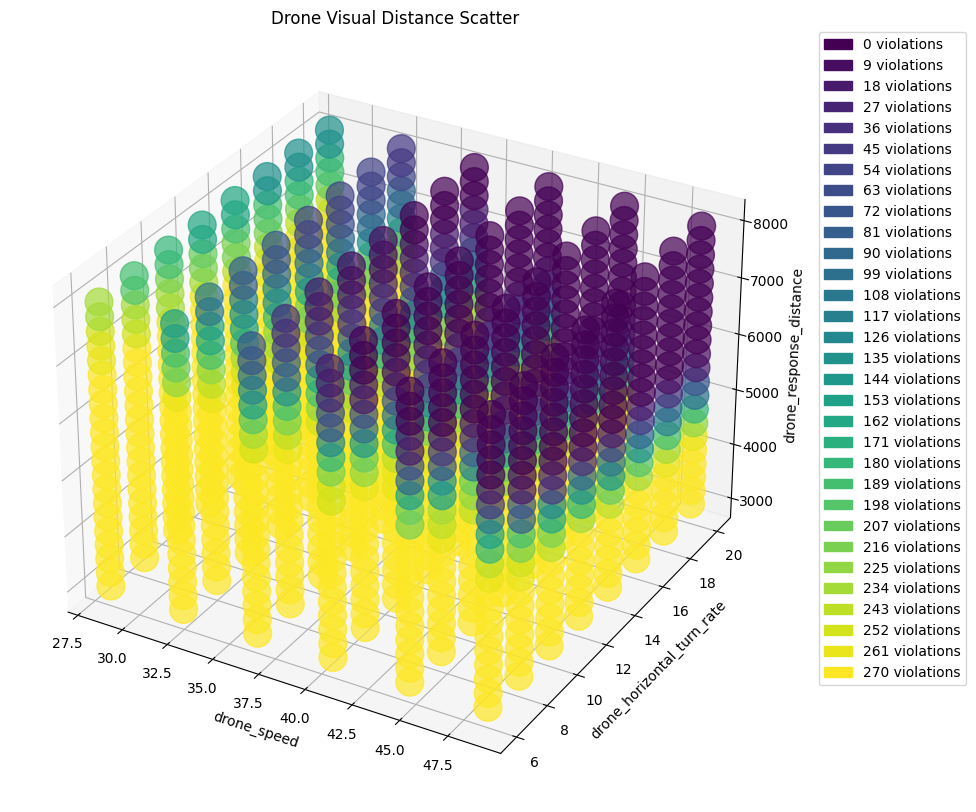

In [157]:
# tmp = all_exps[all_exps['drone_y_pos'] <= 2000]
tmp = isolate(all_exps, {"is_violation": 1})
plot_point_cloud(tmp, "drone_speed", "drone_horizontal_turn_rate", "drone_response_distance", "Drone Visual Distance Scatter", point_radius=20)

In [183]:
# best = isolate(all_exps, {'is_violation': 0, 'drone_y_pos': 4000, 'drone_response_distance': 4200, 'heli_speed': 109})
best = isolate(all_exps, 
    {
        'is_violation': 1, 
        'drone_y_pos': 4000, 
        "drone_horizontal_turn_rate": 12.0, 
        "drone_speed": 40.6153, 
        # "drone_response_distance": 6250,
        "heli_speed": 114.7383
})
# best = isolate(all_exps, {'is_violation': 0, 'drone_y_pos': 4000, 'drone_speed': 36, 'heli_speed': 118})
# best.drone_horizontal_turn_rate.min()
isolate(all_exps, {
    'is_violation': 0,
    'drone_y_pos': 4000, 
    "drone_speed": 40.6153, 
    "heli_speed": 114.7383
}).drone_response_distance.min()
# best.heli_speed
# speeds = best.drone_speed.to_numpy()
# speeds.sort()
# speeds
# best[(best.drone_response_distance == 4200)]



6250.0

In [165]:
90/13

6.923076923076923